# Multi-Class Prediction of Obesity Risk

Link: https://www.kaggle.com/competitions/playground-series-s4e2


Challenge description:

The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("data/train.csv").set_index("id")
df.rename(columns={"NObeyesdad": "Target"}, inplace=True)  
df.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Target
id,,,,,,,,,,,,,,,,,
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


## Preprocessing

In [3]:
# add new column - BMI index
df["BMI"] = df["Weight"] / (df["Height"])**2

In [4]:
# convert yes /no columns into boolean columns
boolean_columns = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
map_to_boolesn = {"no": False, "yes": True}
for column_name in boolean_columns:
    df[column_name] = df[column_name].map(map_to_boolesn)

In [5]:
# Add unique class ud for each obesity level
target_columns_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

idx2label = {idx: label for idx, label in enumerate(target_columns_order)}
label2idx = {label: idx for idx, label in enumerate(target_columns_order)}
df["Target Id"] = df["Target"].map(label2idx)


In [6]:
## split all features into three categories: boolean, numeric or categorical
categorical_columns = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad', "Target"]
boolean_columns = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
numeric_columns = ['CH2O', 'FAF', 'FCVC', 'NCP', 'TUE', 'Age', 'Height', 'Weight', "BMI", "Target Id"]


# Add column description:
column_description_dict = {"FAVC": "Frequent consumption of high caloric food",
                           "FCVC": "Frequency of consumption of vegetables",
                           "NCP": "Number of main meals",
                           "CAEC": "Consumption of food between meals",
                           "CH20": "Consumption of water daily ",
                           "CALC": "Consumption of alcohol",
                           "SCC": "Calories consumption monitoring  ",
                           "FAF": "Physical activity frequency ",
                           "TUE": "Time using technology devices",
                           "MTRANS": "Transportation used",
                          }

## Data Overview

### Demography

Approximatelly the same number of men and women at different age between 14 and 61 years old.
50% of respondents are aged between 20 and 26 years old with median around age of 23 years.

Gender
Female    10422
Male      10336
dtype: int64

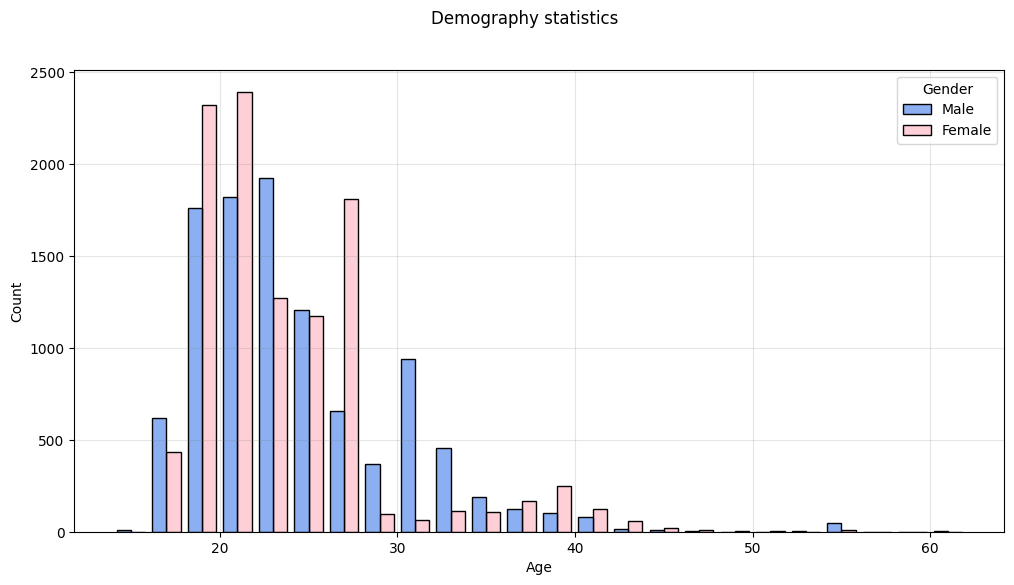

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x="Age", hue="Gender", multiple="dodge", shrink=.8, binwidth=2,
             palette=sns.color_palette(['cornflowerblue', 'pink']), ax=ax)
ax.grid(c='gray', alpha=0.2)
fig.suptitle("Demography statistics")
fig.show()

df.value_counts("Gender")

### Obsity level based on genetical predispositions and gender 

Conclusion: 
It seems like family_history_with_overweight is a significant factor in terms of obesity level. For women this factor is more significant than form men - women with family history overweight are more susceptible to be overweight.


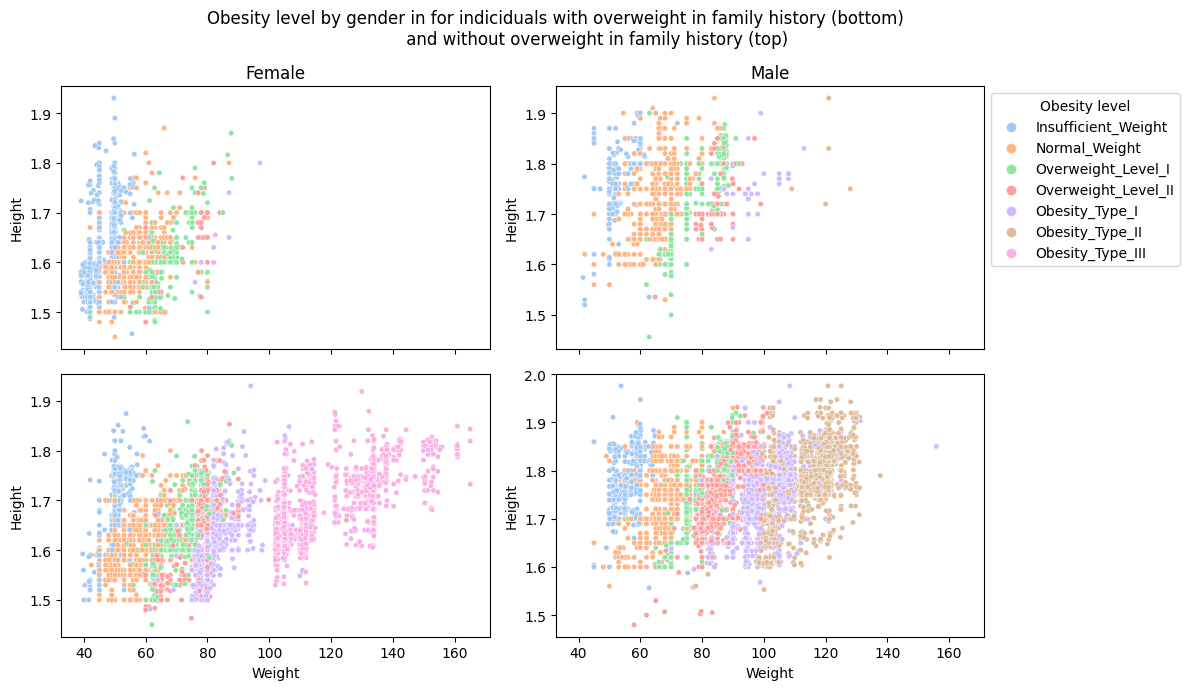

In [8]:
tmp_1 = df[(df["Gender"]=="Female") & (df["family_history_with_overweight"] == False)]
tmp_2 = df[(df["Gender"]=="Female") & (df["family_history_with_overweight"] == True)]
tmp_3 = df[(df["Gender"]=="Male") & (df["family_history_with_overweight"] == False)]
tmp_4 = df[(df["Gender"]=="Male") & (df["family_history_with_overweight"]==True)]

fig, axs = plt.subplots(2,2, figsize=(12, 7), sharex=True)

sns.scatterplot(data=tmp_1, x="Weight", y="Height", legend=False, ax=axs[0][0], s=15,
                hue="Target", hue_order = target_columns_order, palette="pastel")
sns.scatterplot(data=tmp_2, x="Weight", y="Height", legend=False, ax=axs[1][0], s=15,
                hue="Target", hue_order = target_columns_order, palette="pastel")
sns.scatterplot(data=tmp_3, x="Weight", y="Height", legend=True, ax=axs[0][1], s=15,
                hue="Target", hue_order = target_columns_order, palette="pastel")
sns.scatterplot(data=tmp_4, x="Weight", y="Height", legend=False, ax=axs[1][1], s=15,
                hue="Target", hue_order = target_columns_order, palette="pastel")

axs[0][0].set_title("Female")
axs[0][1].set_title("Male")
axs[0][1].legend(loc='upper left', bbox_to_anchor=(1, 1), title="Obesity level")

fig.suptitle("Obesity level by gender in for indiciduals with overweight in family history (bottom) \
              \n and without overweight in family history (top)")
fig.tight_layout()


### Percentage of individuals with different obesity Levels based on gender

Conclusion:
Women are much more likely to fall into extremas: underweight or obese.

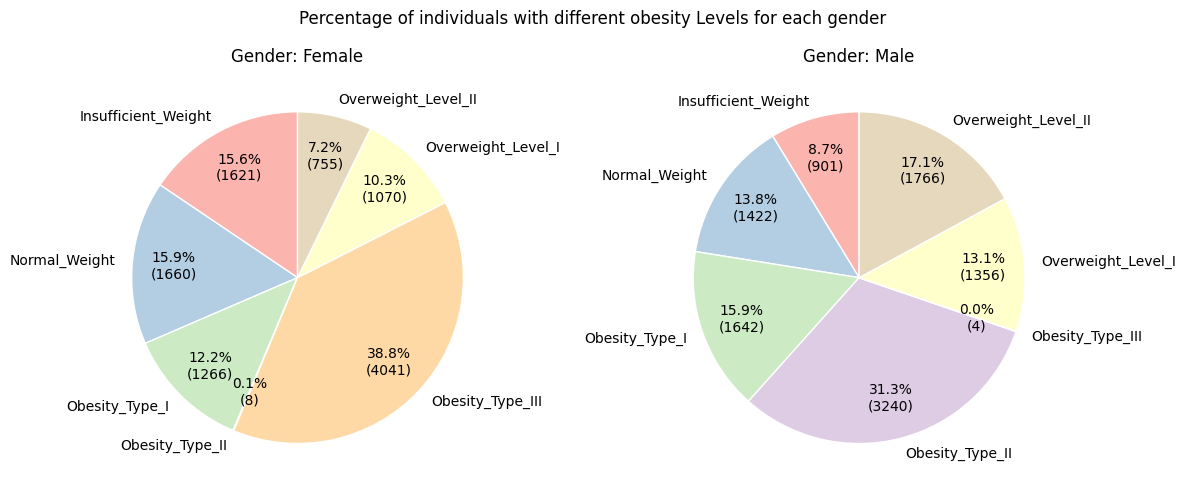

In [9]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

labels_female = df[df["Gender"]=="Female"]["Target"].value_counts().sort_index().index.tolist()
sizes_female = df[df["Gender"]=="Female"]["Target"].value_counts().sort_index().values.tolist()

labels_male = df[df["Gender"]=="Male"]["Target"].value_counts().sort_index().index.tolist()
sizes_male = df[df["Gender"]=="Male"]["Target"].value_counts().sort_index().values.tolist()

# set ,colors
size=0.3
cmap = plt.get_cmap("Pastel1")
colors = cmap(np.arange(len(labels_female)))

fig, axs = plt.subplots(1,2, figsize=(12, 5))
axs[0].set_title("Gender: Female")
axs[0].pie(sizes_female, labels=labels_female, autopct=lambda pct: func(pct, sizes_female), pctdistance=0.75,
           wedgeprops = {'linewidth': 1, 'edgecolor':"white"}, colors=colors, startangle=90)
axs[1].set_title("Gender: Male")
axs[1].pie(sizes_male, labels=labels_male, autopct=lambda pct: func(pct, sizes_male), pctdistance=0.75,
           wedgeprops = {'linewidth': 1, 'edgecolor':"white"}, colors=colors,startangle=90)

fig.suptitle("Percentage of individuals with different obesity Levels for each gender")
fig.tight_layout()
plt.show()

### The influence of  eating habits on obesity level

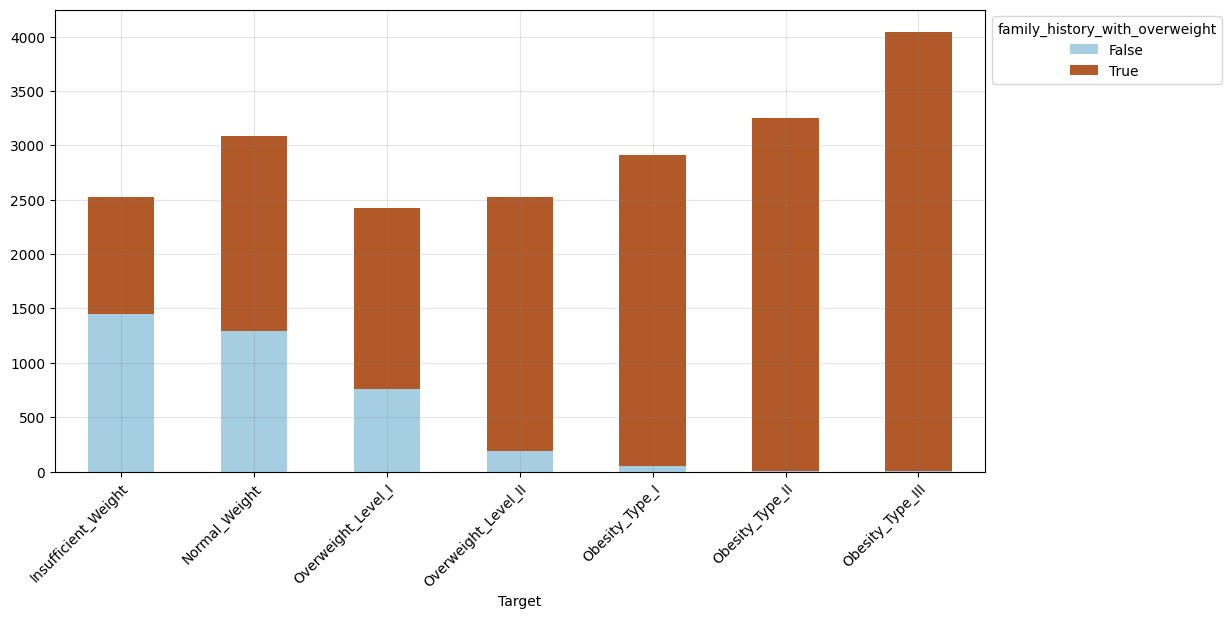

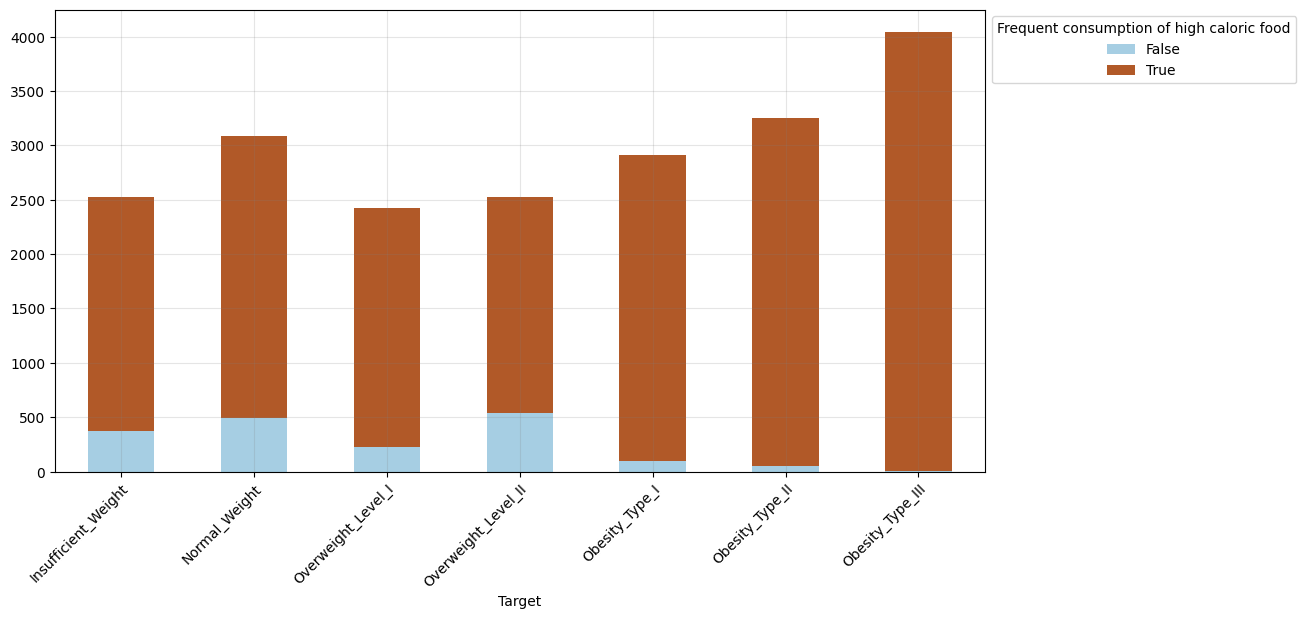

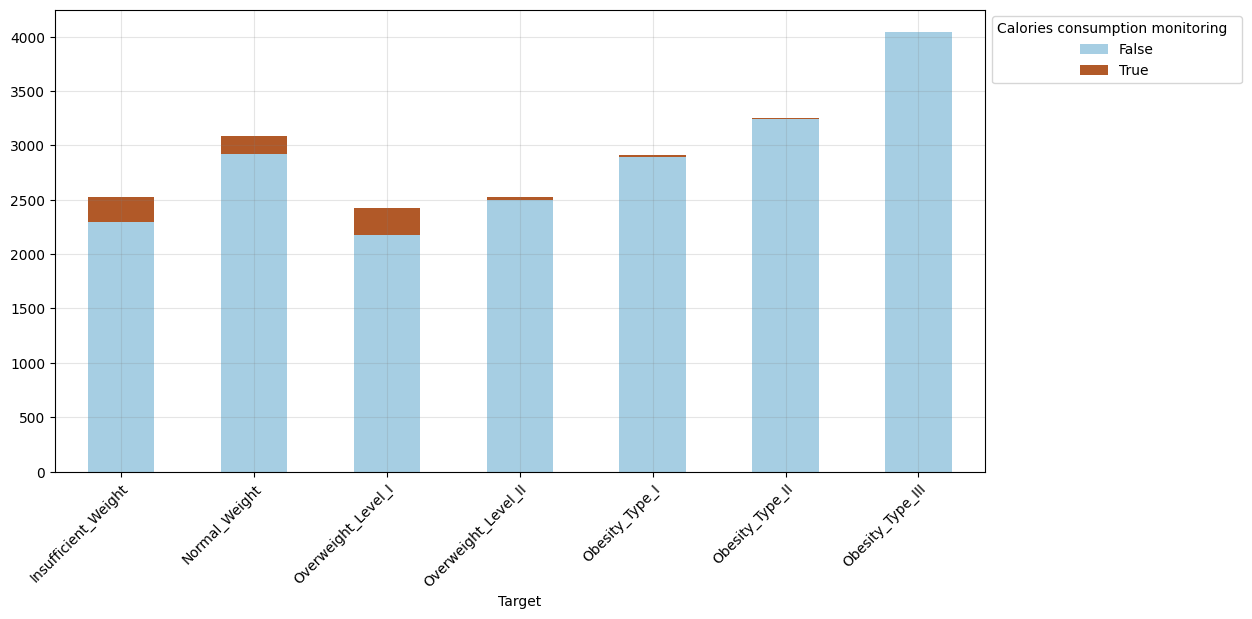

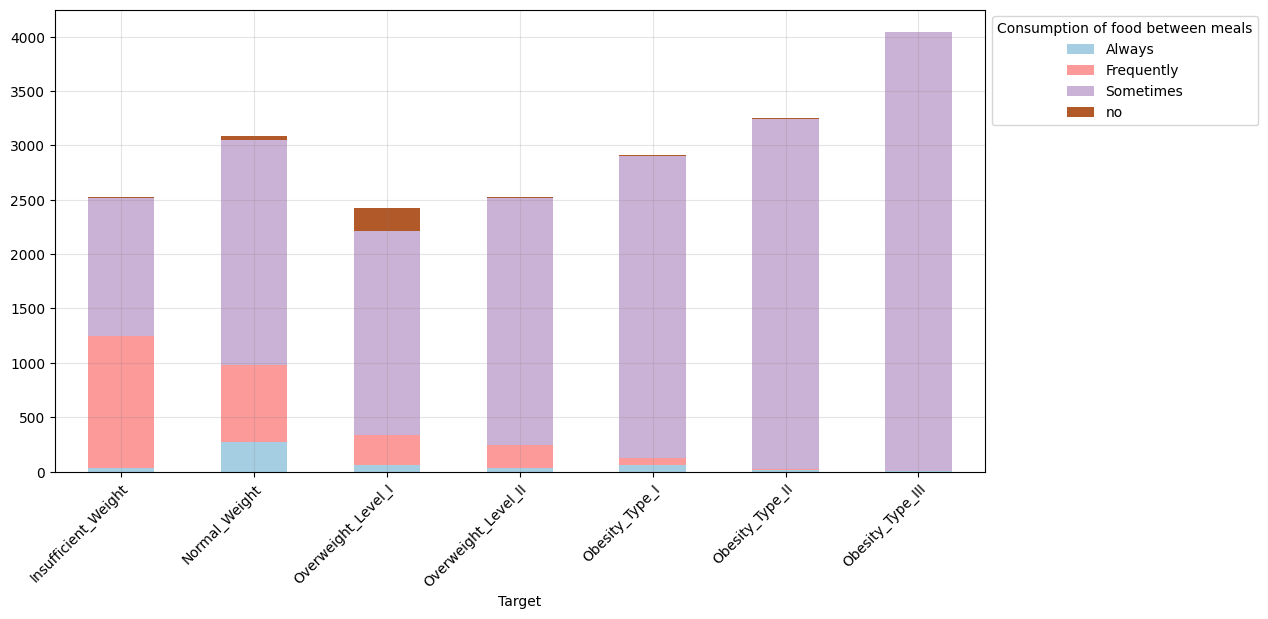

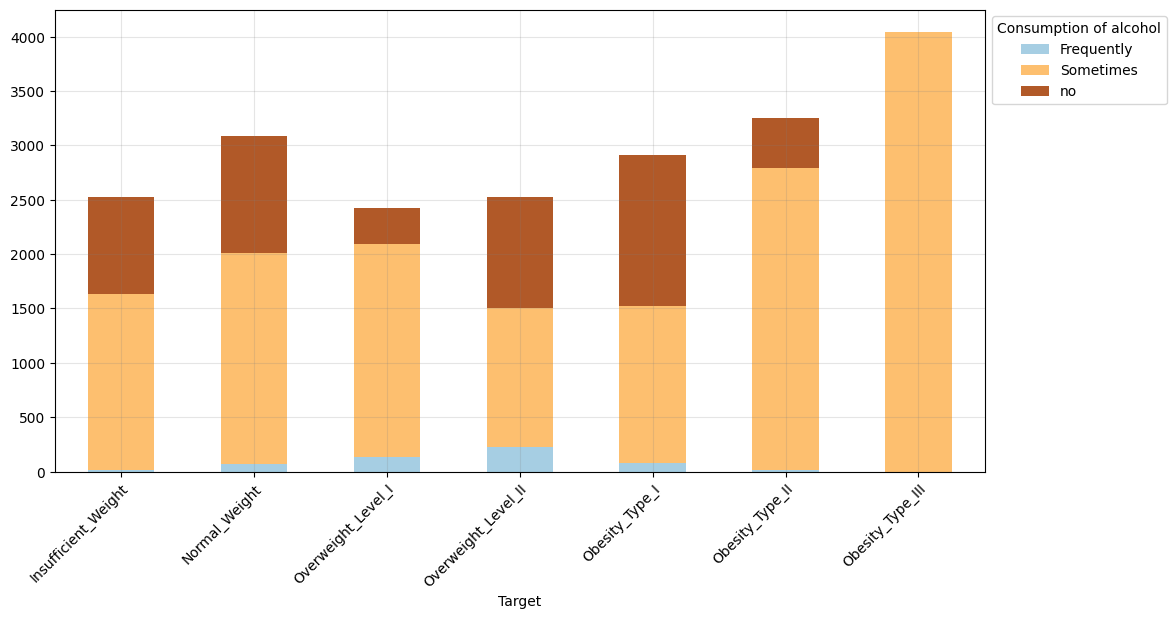

In [10]:
def create_stacked_plot(column_name):
    pt = pd.pivot_table(df[["Target", "Gender", column_name]], index="Target", columns=column_name, aggfunc="count", fill_value=0)
    pt.columns = pt.columns.droplevel(0)
    pt = pt.reset_index().rename_axis(None, axis=1).set_index("Target")
    pt = pt.loc[target_columns_order, :]
    
    legend_text = column_description_dict[column_name] if column_name in column_description_dict else column_name
       
    fig, ax = plt.subplots(figsize=(12, 6))
    pt.plot(kind="bar", ax=ax, stacked=True, cmap="Paired")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title=legend_text)
    ax.grid(c='gray', alpha=0.2)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.show()
    
    
for col in ['family_history_with_overweight', 'FAVC', 'SCC', 'CAEC', 'CALC']:   
    create_stacked_plot(column_name=col)

### Impact of behavioral habits on obesity level

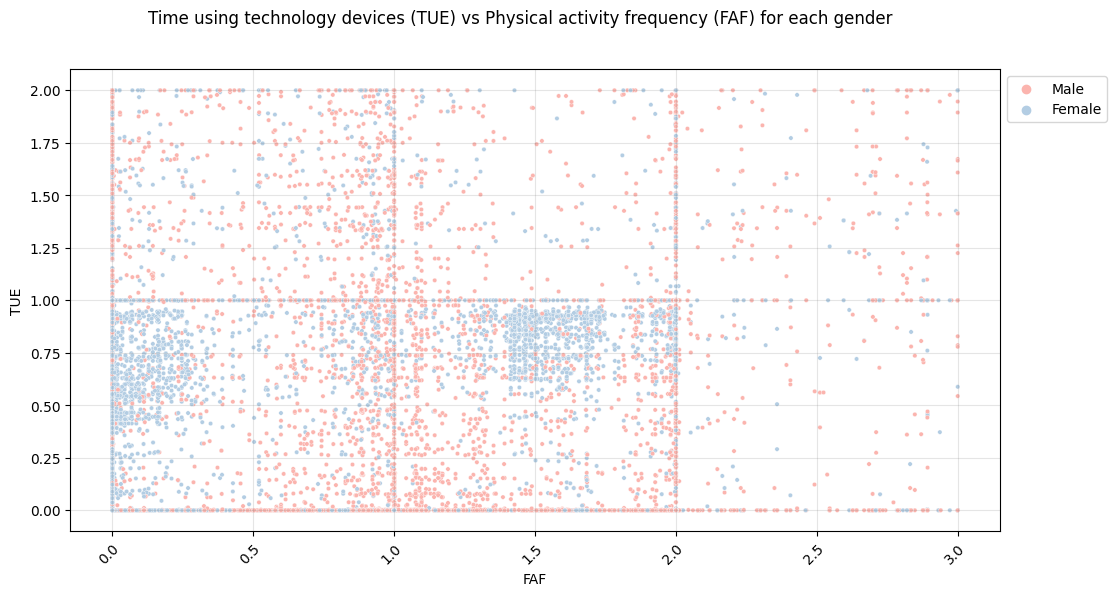

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(df, x="FAF", y="TUE", hue="Gender", palette="Pastel1", s=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(c='gray', alpha=0.2)
fig.suptitle("Time using technology devices (TUE) vs Physical activity frequency (FAF) for each gender")
fig.show()

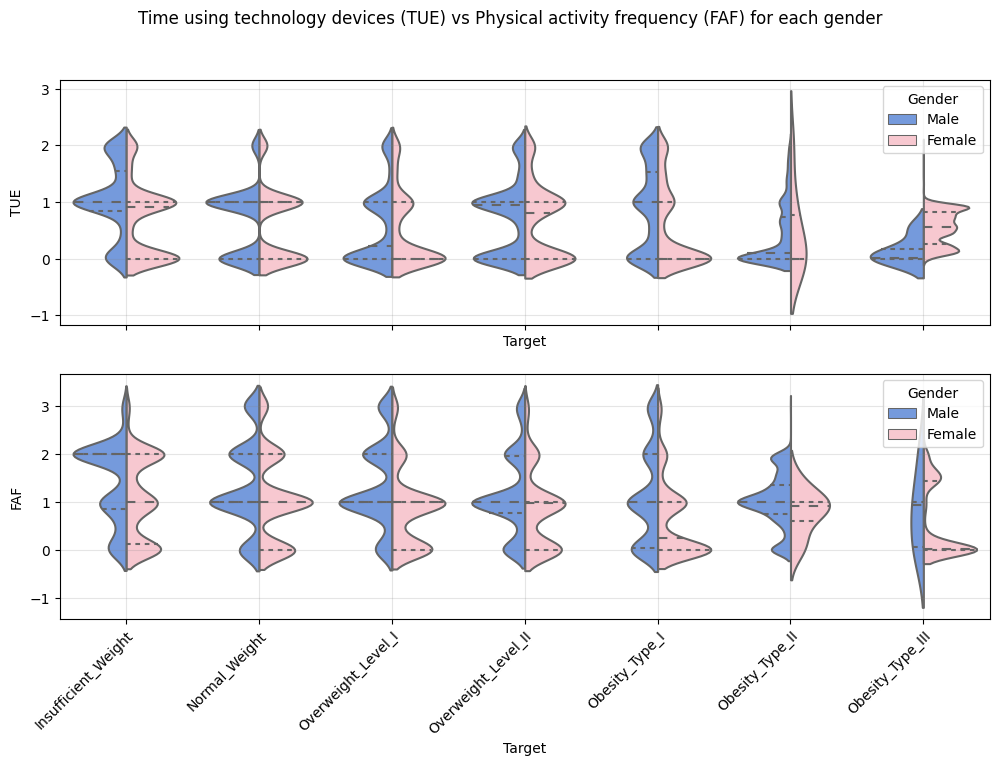

In [12]:
fig, axs = plt.subplots(2, 1,figsize=(12, 7), sharex=True)
sns.violinplot(df, x="Target", y="TUE", order=target_columns_order, split=True, inner="quart",
               hue="Gender",  ax=axs[0], palette=sns.color_palette(['cornflowerblue', 'pink']))
sns.violinplot(df, x="Target", y="FAF", order=target_columns_order, split=True, inner="quart",
               hue="Gender",  ax=axs[1], palette=sns.color_palette(['cornflowerblue', 'pink']))

for ax in axs:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax.grid(c='gray', alpha=0.2)
    
fig.suptitle("Time using technology devices (TUE) vs Physical activity frequency (FAF) for each gender")
fig.show()

### Impact of smoaking (SMOKE) and alcohol consumption (CALC) on obesity level

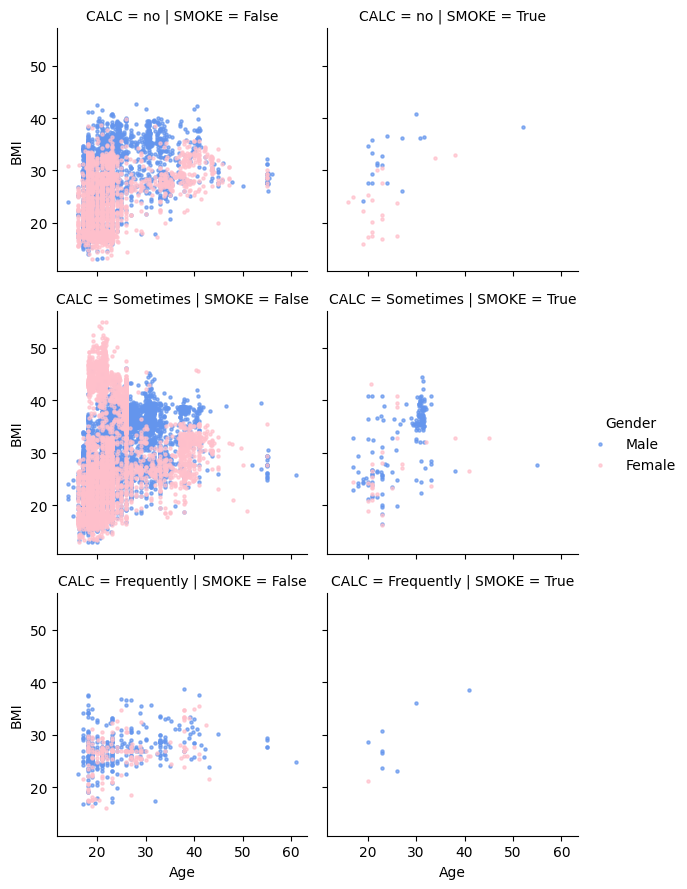

In [13]:
sns.lmplot(
    data=df, x="Age", y="BMI", hue="Gender", fit_reg=False, 
    col="SMOKE", col_order=[False, True],
    row="CALC", row_order=["no", "Sometimes", "Frequently"],
    palette=sns.color_palette(['cornflowerblue', 'pink']), 
    scatter_kws={"s": 5, "alpha": 0.7}, height=3,
    facet_kws=dict(sharex=True, sharey=True),
);

### Impact of Frequent consumption of high caloric food (FAVC) and consumption of food between meals (CAEC) on obesity level

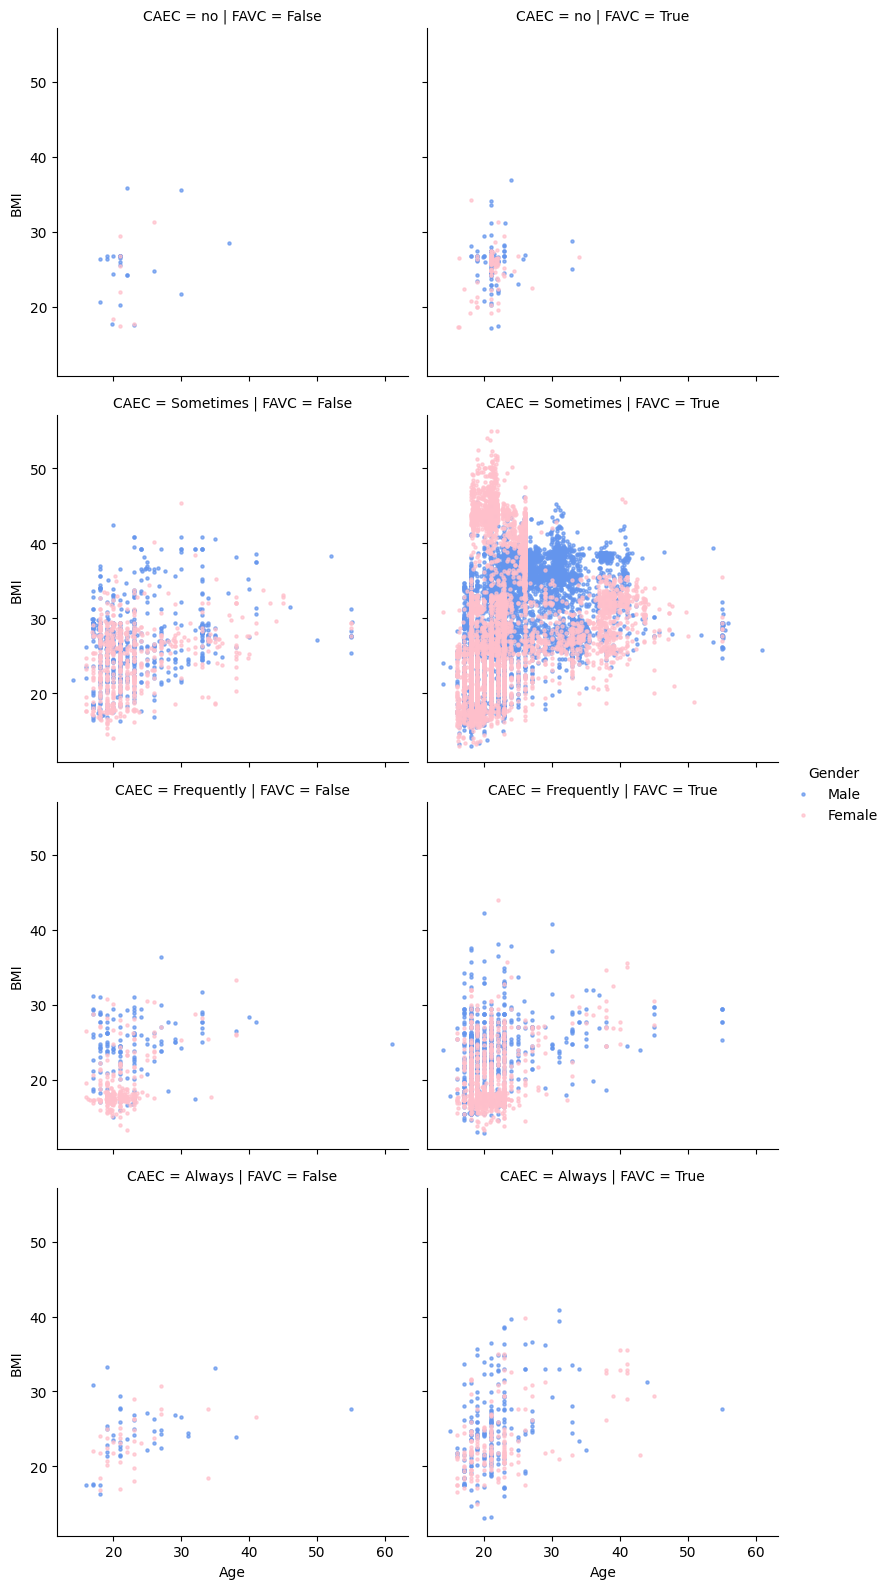

In [14]:
sns.lmplot(
    data=df, x="Age", y="BMI", hue="Gender", fit_reg=False, 
    col="FAVC", col_order=[False, True],
    row="CAEC", row_order=["no", "Sometimes", "Frequently", "Always"],
    palette=sns.color_palette(['cornflowerblue', 'pink']), 
    scatter_kws={"s": 5, "alpha": 0.7}, height=4,
    facet_kws=dict(sharex=True, sharey=True),
);

## Correlation matrix

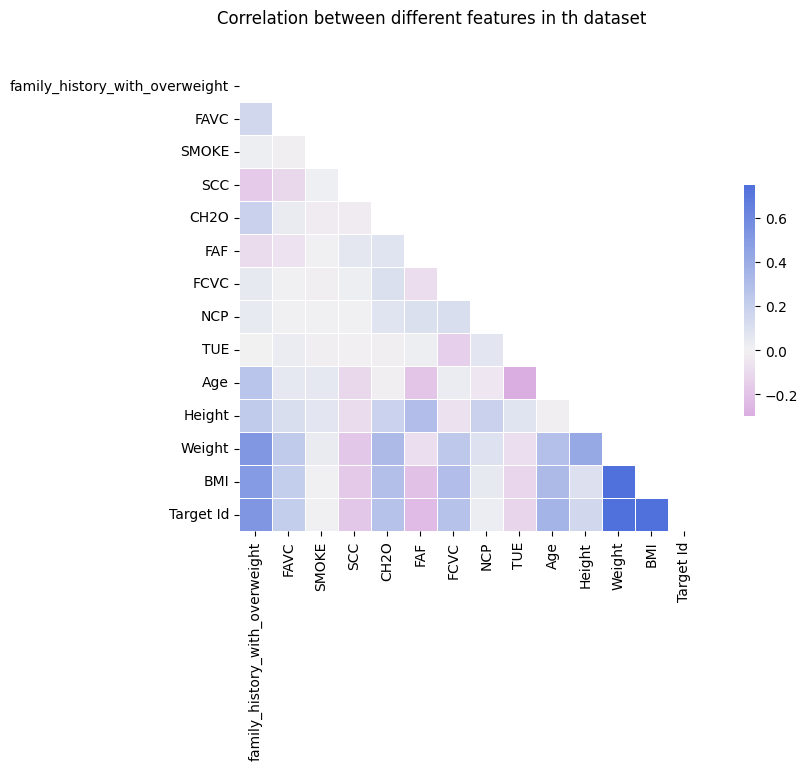

In [15]:
corr_df = df[boolean_columns+numeric_columns].corr()

cmap = sns.diverging_palette(300, 260, as_cmap=True)
mask = np.triu(np.ones_like(corr_df, dtype=bool))

f, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(corr_df, cmap=cmap, center=0, vmax=0.75, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.suptitle("Correlation between different features in th dataset")
f.show()